In [1]:
from sklearn.datasets import *
from Utils.lect3 import *
from IPython.display import Image
import numpy as np
import Utils.mlutils as mlutils
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Support vector machines

### Linear SVM Classification
Just like linear classification but this line not only separates the two classes but also stays as far away from the closest training instances as possible.


![](img/fig4.png)

### Soft Margin Classification
If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification.
* Only works if the data is linearly separable
* quite sensitive to outliers

![](img/fig5.png)

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification

ou can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.
![](img/fi6.png)

In [2]:
from sklearn.svm import SVC

X,y = make_blobs(300, centers=2, cluster_std=1)

1.0
number of support vectors 3


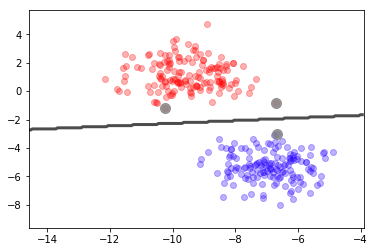

In [3]:
sv = SVC(kernel='linear', C=1)
sv.fit(X,y)
print(sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print("number of support vectors", len(sv.support_vectors_))

### Nonlinear SVM Classification

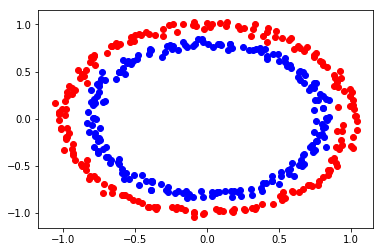

In [4]:
X,y = make_circles(400, noise=0.03)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')

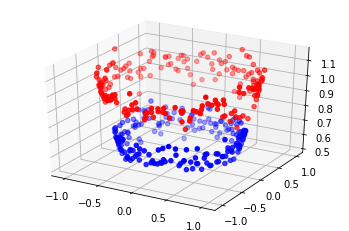

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0][:,0], X[y==0][:,1], (X[y==0][:,1]**2 + X[y==0][:,0]**2), color='red')
ax.scatter(X[y==1][:,0], X[y==1][:,1], (X[y==1][:,1]**2 + X[y==1][:,0]**2), color='blue')

1.0
number of support vectors 107


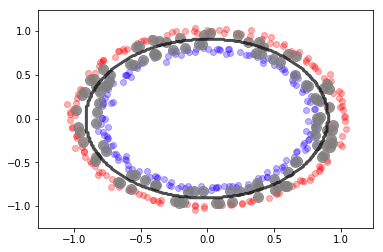

In [6]:
sv = SVC(kernel='poly', gamma='auto', degree=2, coef0=1, C=5)

sv.fit(X,y)
print(sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print("number of support vectors", len(sv.support_vectors_))

### $\gamma$ controls how we measure the similarity

## Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
#X,y = make_moons(400, noise=0.1)
#Xts,yts = make_moons(100, noise=0.1)

X,y = make_blobs(400, centers=2, cluster_std=2)
Xts,yts = make_blobs(100, centers=2, cluster_std=2)

In [8]:
X.shape, y.shape

((400, 2), (400,))

In [9]:
np.unique(y)

array([0, 1])

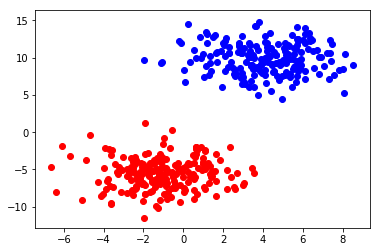

In [10]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')

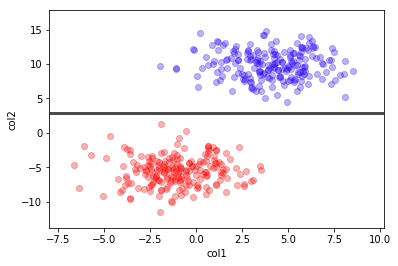

In [11]:
dt = DecisionTreeClassifier(max_depth=2); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col1"); plt.ylabel("col2");

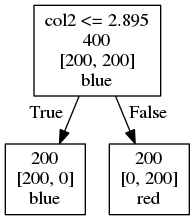

In [12]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

### The CART algorithm
Splits the training set in two subsets using a single feature $k$ and a threshold $t_k$ (e.g., “petal length ≤ 2.45 cm”).

How does it choose $k$ and $t_k$ ? It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size).

recursively apply same logic until it reaches the maximum depth

### Regularization Hyperparameters

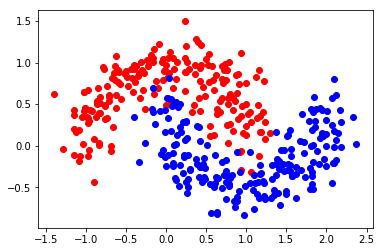

In [13]:
X,y = make_moons(400, noise=0.2)
Xts,yts = make_moons(100, noise=0.2)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')

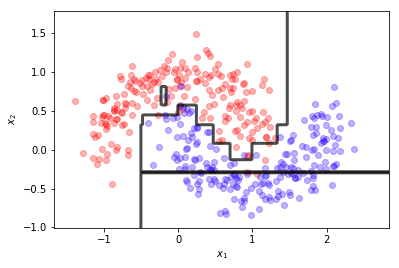

In [14]:
dt = DecisionTreeClassifier(max_depth=10); dt.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)

mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("$x_1$"); plt.ylabel("$x_2$");

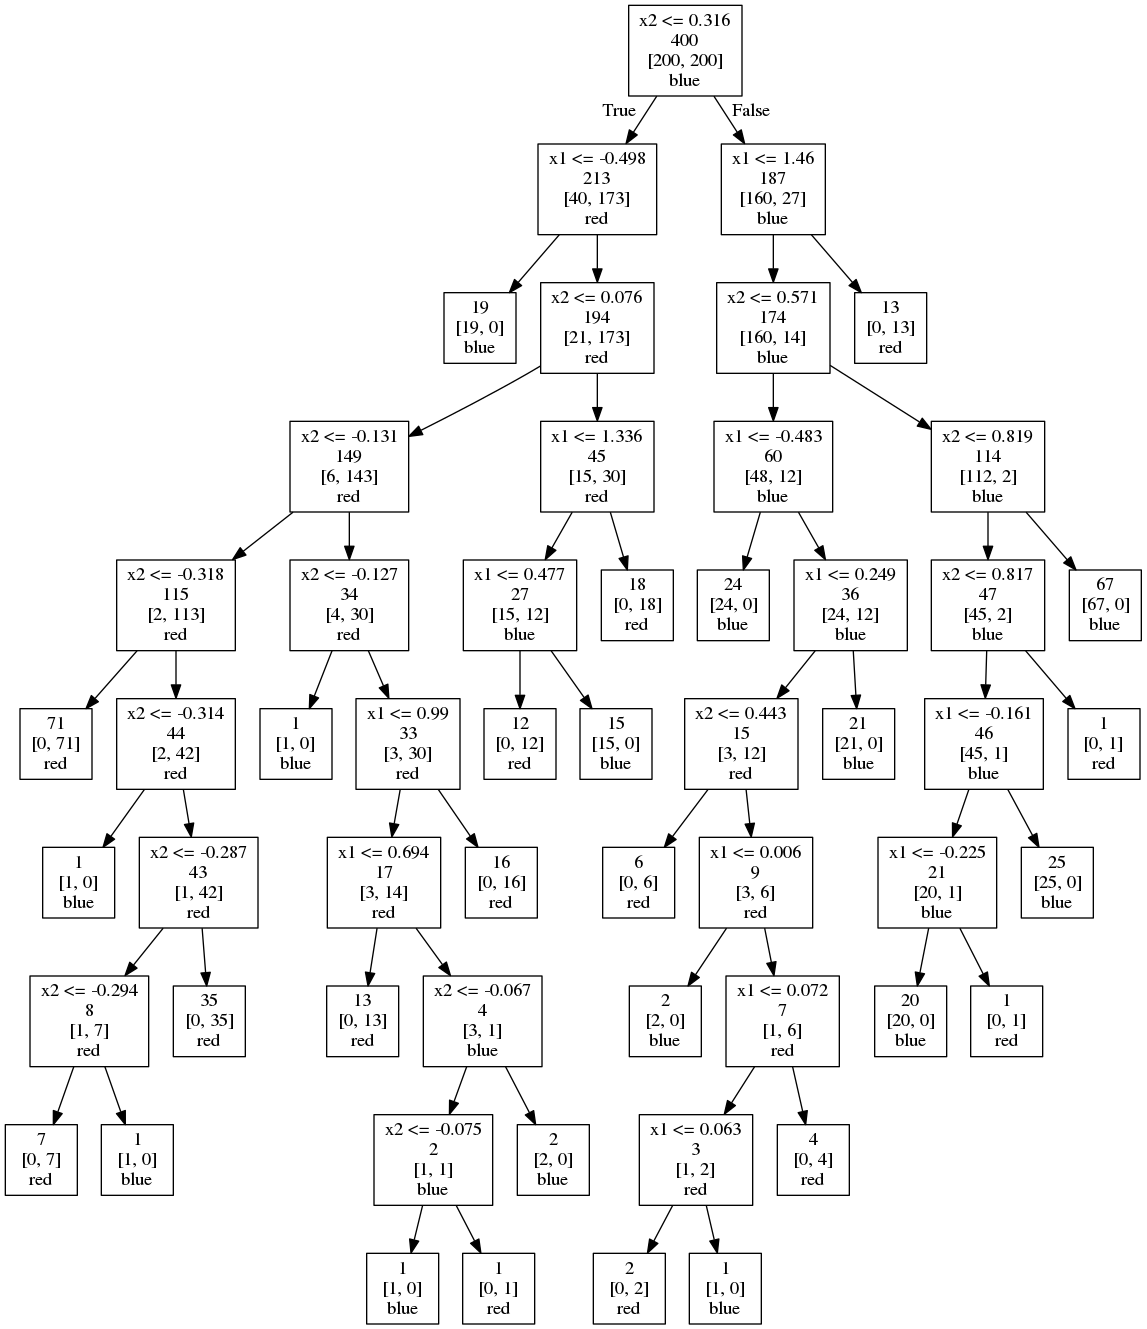

In [15]:
visualize_tree(dt, ["x1", "x2"])
Image("/tmp/dt.png", width=300)

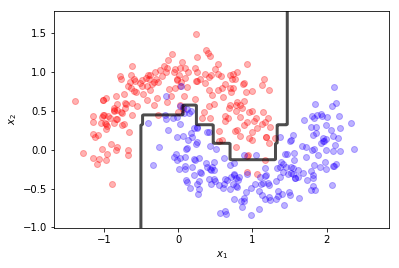

In [16]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4); dt.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)

mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("$x_1$"); plt.ylabel("$x_2$");

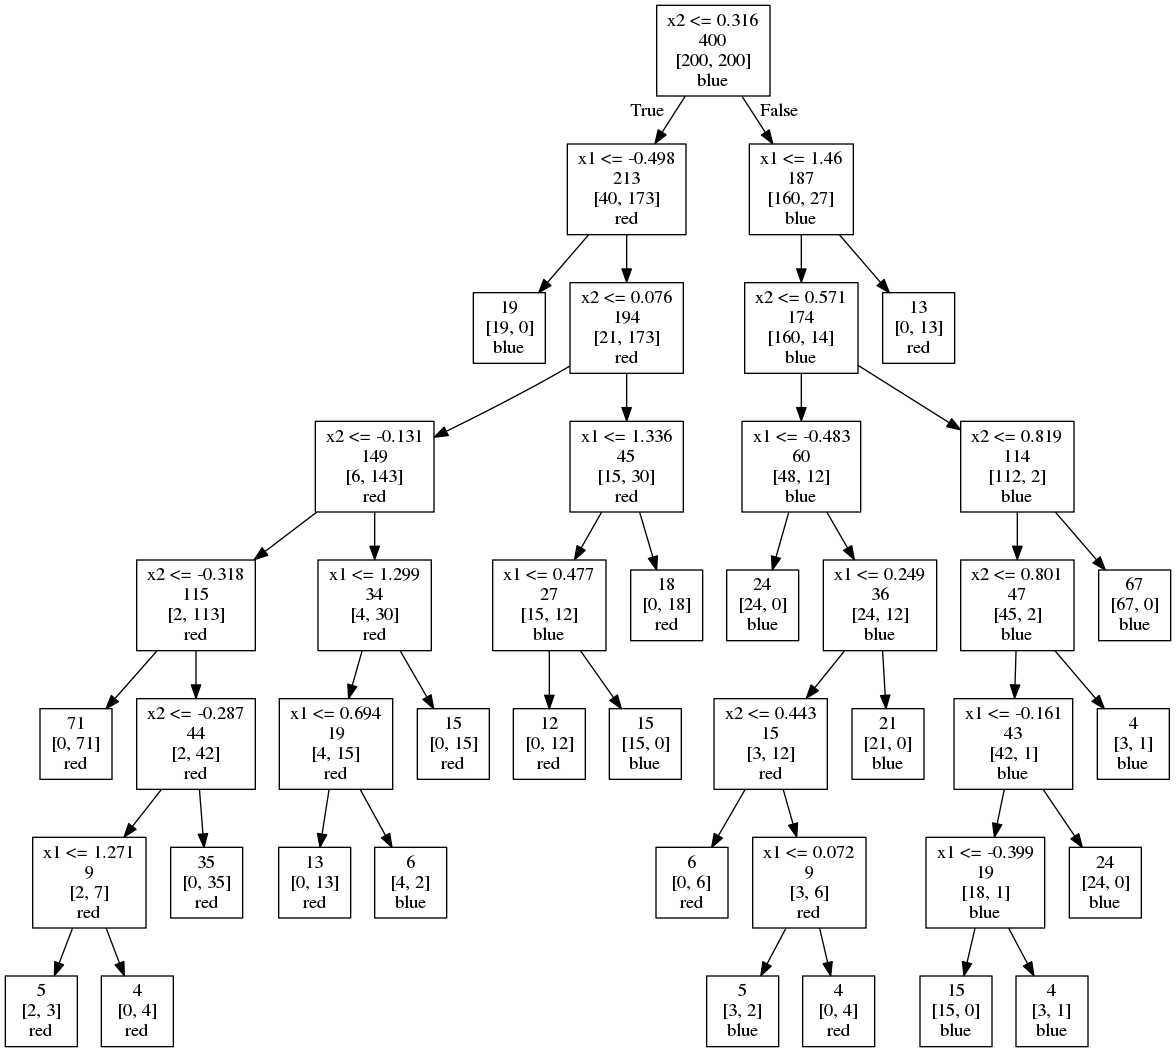

In [17]:
visualize_tree(dt, ["x1", "x2"])
Image("/tmp/dt.png", width=300)

#### Decision Trees are 
* simple to understand and interpret
* easy to use
* versatile
* powerful

#### But
* love orthogonal decision boundaries
* very sensitive to small variations in the training data

(0.42, 0.58)

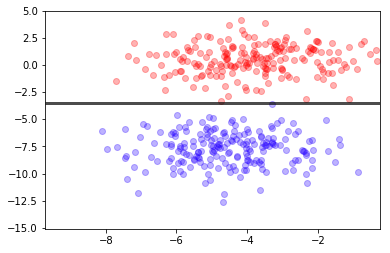

In [18]:
X,y = make_blobs(400, centers=2, cluster_std=1.5)

dt = DecisionTreeClassifier(); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

(1.0, 0.0)

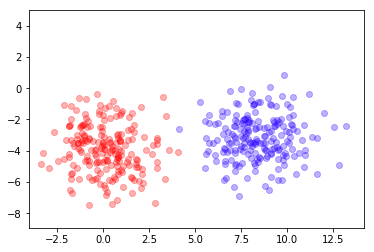

In [19]:
rotate = lambda th: np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
X1 = (rotate(np.deg2rad(100)) @ X.T).T

dt = DecisionTreeClassifier(); dt.fit(X1,y)
mlutils.plot_2Ddata(X1, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X1, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

# Ensemble Learning

decision tree       0.9824999999999999
logistic regression 0.8724999999999999
poly svm degree 2   0.77


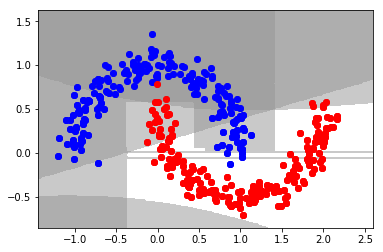

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

X,y = make_moons(400, noise=0.1)

dt = DecisionTreeClassifier(); dt.fit(X,y)
lr = LogisticRegression(); lr.fit(X,y)
sv = SVC(kernel="poly", degree=2); sv.fit(X,y)

print("decision tree      ", np.mean(cross_val_score(dt, X,y, cv=10)))
print("logistic regression", np.mean(cross_val_score(lr, X,y, cv=10)))
print("poly svm degree 2  ", np.mean(cross_val_score(sv, X,y, cv=10)))
plot_2Ddata_with_boundary(dt.predict, X,y)
plot_2Ddata_with_boundary(lr.predict, X,y)
plot_2Ddata_with_boundary(sv.predict, X,y)

### Voting

ensemble score 0.9275


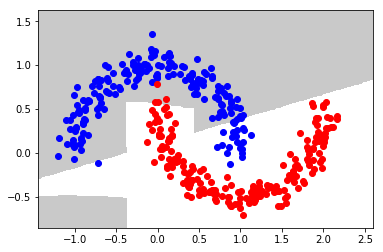

In [29]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('sv', sv)]
)

vc.fit(X, y)

print("ensemble score", np.mean(cross_val_score(vc, X,y, cv=10)))
plot_2Ddata_with_boundary(vc.predict, X,y)

### Bagging
Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

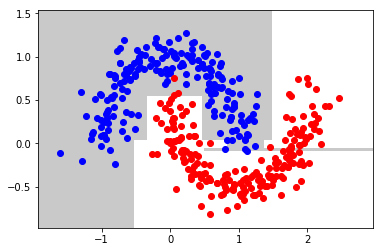

In [36]:
from sklearn.tree import DecisionTreeClassifier

X,y = make_moons(400, noise=0.15)

dt = DecisionTreeClassifier(); dt.fit(X,y)
plot_2Ddata_with_boundary(dt.predict, X,y)

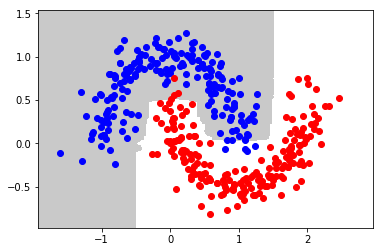

In [38]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X, y)


plot_2Ddata_with_boundary(bag_clf.predict, X,y)

## Random Forests = Decision tree + bagging

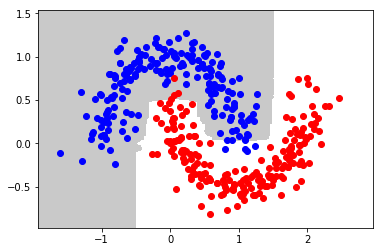

In [41]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnd_clf.fit(X, y)

y_pred_rf = rnd_clf.predict(X)

plot_2Ddata_with_boundary(bag_clf.predict, X,y)

### Feature Importance via Random Forest
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree<br>
$\to$ estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest.

In [43]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

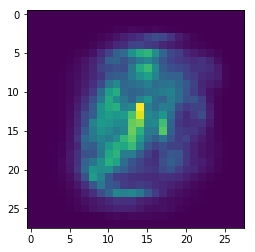

In [47]:
plt.imshow(rnd_clf.feature_importances_.reshape(28,28))